In [1]:
import numpy as np
import pandas as pd

# import reviews data
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# check how many reviews top users have
reviews.groupby('user_id').count().sort_values(by='review_id', ascending=False)

,review_id,business_id,stars,useful,funny,cool,text,date
user_id,,,,,,,,
_BcWyKQL16ndpBdggh2kNA,3048,3048,3048,3048,3048,3048,3048,3048
Xw7ZjaGfr0WNVt6s_5KZfA,1840,1840,1840,1840,1840,1840,1840,1840
0Igx-a1wAstiBDerGxXk2A,1747,1747,1747,1747,1747,1747,1747,1747
-G7Zkl1wIWBBmD0KRy_sCw,1682,1682,1682,1682,1682,1682,1682,1682
ET8n-r7glWYqZhuR6GcdNw,1653,1653,1653,1653,1653,1653,1653,1653
...,...,...,...,...,...,...,...,...
Q3vRxWvwiqyTnsNqlVFJgQ,1,1,1,1,1,1,1,1
Q3usHTFn9UhwoMfos5XczA,1,1,1,1,1,1,1,1
Q3toekMAlCz8VrMyU8oo4w,1,1,1,1,1,1,1,1


In [44]:
# select the 1000 most active users
active_users = reviews.groupby('user_id').count().sort_values(by='review_id', ascending=False).reset_index()['user_id'].tolist()[:1000]

# check the user id of top users
active_users[:5]

['_BcWyKQL16ndpBdggh2kNA',
 'Xw7ZjaGfr0WNVt6s_5KZfA',
 '0Igx-a1wAstiBDerGxXk2A',
 '-G7Zkl1wIWBBmD0KRy_sCw',
 'ET8n-r7glWYqZhuR6GcdNw']

In [45]:
user_ratings, user_count  = [], []

# create a list tracking the mean rating of users over time
for user in active_users:
    user_history, user_n = [], []
    user_reviews = reviews[reviews['user_id'] == user].sort_values(by='date')
    for n in range(25, user_reviews.shape[0], 10):
        first_n_reviews = user_reviews.iloc[:n, :]
        user_history.append(first_n_reviews['stars'].mean())
        user_n.append(n)
    user_ratings.append(user_history)
    user_count.append(user_n)

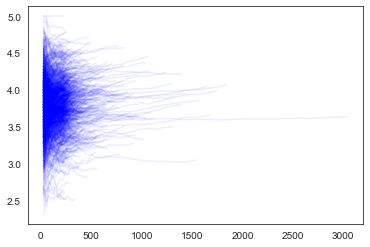

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

# plot the data for each user
for ratings, count in zip(user_ratings, user_count):
    sns.lineplot(x=count, y=ratings, color='blue', alpha=0.07)

plt.savefig('figures/criticism_over_time.png', dpi=250)
plt.show()

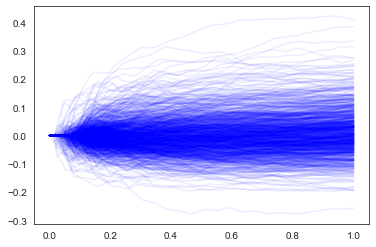

In [47]:
import numpy as np

# normalize user ratings so that they always start at 0
normalized_user_ratings = []
for user_rating in user_ratings:
    normalized_user_ratings.append(-1 + np.array([user_rating[0]] + user_rating) / user_rating[0])

# normalize user n so that we have all lines of same length
normalized_user_count = []
for user_n in user_count:
    normalized_user_count.append(np.array([0] + user_n) / user_n[-1])

# plot the data for each user
for ratings, count in zip(normalized_user_ratings, normalized_user_count):
    sns.lineplot(x=count, y=ratings, color='blue', alpha=0.07)

plt.savefig('figures/criticism_over_time_2.png', dpi=250)
plt.show()

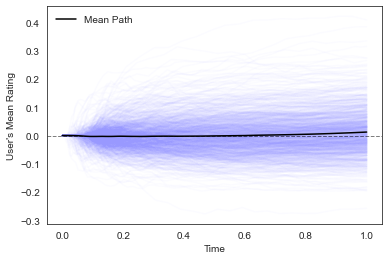

In [50]:
mean_path = np.zeros(100)
mean_path_x = np.linspace(0, 1, 100)

for ratings, count in zip(normalized_user_ratings, normalized_user_count):
    sns.lineplot(x=count, y=ratings, color=[0.6, 0.6, 1.0], alpha=0.03)
    mean_path += np.interp(mean_path_x, count, ratings)

mean_path /= len(normalized_user_ratings)

plt.axhline(ls='--', alpha=0.5, lw=1, color='k')
sns.lineplot(x=mean_path_x, y=mean_path, color='k', alpha=1, label='Mean Path')
plt.legend(loc=2, frameon=False)

plt.ylabel("User's Mean Rating")
plt.xlabel('Time')

plt.savefig('figures/criticism_over_time_2.png', dpi=250)
plt.show()